In [2]:
import pandas as pd

In [3]:
pd.set_option('display.width', 1000)

train_data = pd.read_csv('data/Titanic/train.csv') # pandas读取csv文件的方法
test_data = pd.read_csv('data/Titanic/test.csv')




In [12]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [8]:
print(train_data.columns.values) # 看有几个列

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [10]:
print(train_data.head()) # 查看前几条数据
print(train_data.tail()) # 看后面几条数据

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
     PassengerId  Survived  Pclass                                      Name

In [14]:
print(train_data.describe()) # describe只显示数值类型的统计信息，非数值类型的不显示

       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [15]:
print(train_data.info()) # count和数据总数对不上的，说明有数据缺失；如何处理？1. 填充 2. 删除

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# 我们选择用平均值来填充数值类型的数据；分类数据，则用最常见的类别来替代；
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [17]:
# Embarked是分类数据，我们选择用最常见数据填充
print(train_data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [5]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [20]:
print(train_data.Cabin.head(n=30))

0             NaN
1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
28            NaN
29            NaN
Name: Cabin, dtype: object


In [6]:
#由于cabin缺失较多，所以我们选择用U(Unknown)来填充
train_data['Cabin'] = train_data['Cabin'].fillna('U')
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
sex_map = {'male':0, 'female':1}
embark_map = {'S':0, 'C':1, 'Q':2}

train_data['Sex'] = train_data['Sex'].map(sex_map)
train_data['Embarked'] = train_data['Embarked'].map(embark_map)
print(train_data.head())

   PassengerId  Survived  Pclass                                               Name  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Embarked
0            1         0       3                            Braund, Mr. Owen Harris    0  22.0      1      0         A/5 21171   7.2500     U         0
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0          PC 17599  71.2833   C85         1
2            3         1       3                             Heikkinen, Miss. Laina    1  26.0      0      0  STON/O2. 3101282   7.9250     U         0
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0            113803  53.1000  C123         0
4            5         0       3                           Allen, Mr. William Henry    0  35.0      0      0            373450   8.0500     U         0


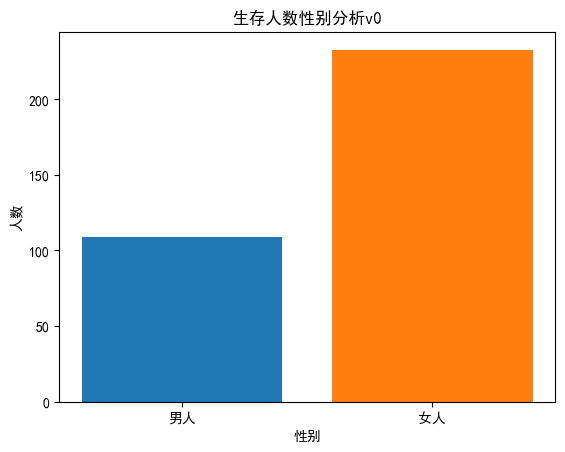

In [8]:
# 查看男女分别生存多少的柱状图
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams["axes.unicode_minus"]=False # 设置字体，不然matplotlib输出中文会乱码

survived_male = train_data[(train_data['Sex'] == 0) & (train_data['Survived'] == 1)] # pandas的条件查询和numpy很像，&是并且的意思
survived_female = train_data[(train_data['Sex'] == 1) & (train_data['Survived'] == 1)]
x = ['男人', '女人']
survived = [len(survived_male), len(survived_female)]
for i in range(len(x)):
    plt.bar(x[i], survived[i])
plt.title('生存人数性别分析v0') # 图表的title
plt.xlabel('性别')
plt.ylabel('人数')
plt.show() # 显示图片

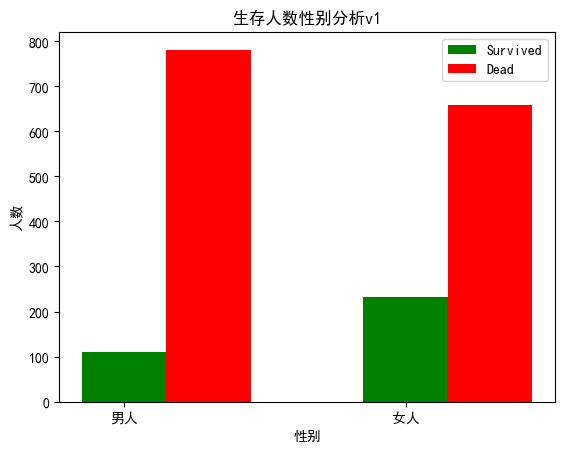

In [9]:
# 查看不同性别人数分别生存多少
bar_1_width = range(0, len(x))
bar_2_width = [i+0.3 for i in bar_1_width]

dead = [len(train_data) - i for i in survived]

plt.bar(bar_1_width, survived, fc='g', width=0.3, label='Survived')
plt.bar(bar_2_width, dead, fc='r', width=0.3, label='Dead')
plt.xticks(range(0, 2), x)

plt.title('生存人数性别分析v1')
plt.xlabel('性别')
plt.ylabel('人数')

plt.legend() # 标示不同图形的文本标签图例
plt.show() 

[10, 20, 30, 40, 50, 60, 70, 80, 90]
[62, 102, 397, 167, 89, 48, 19, 6, 1]


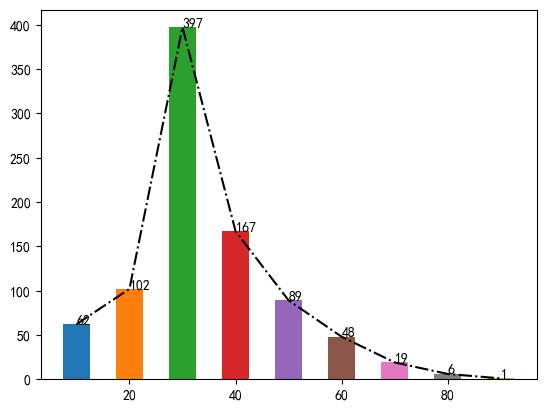

In [10]:
# 查看乘客的年龄分布，首先看最大年龄有多少
age_gap = 10
MAX_AGE = 80
y = []
x = []
init_age = 0
while init_age <= MAX_AGE:
    x.append(init_age+10)
    num_passenger = len(train_data[(train_data['Age'] >= init_age) & (train_data['Age'] < (init_age + age_gap))])
    y.append(num_passenger)
    init_age += age_gap
print(x)
print(y)

for i in range(len(x)):
    plt.bar(x[i], y[i], width=5)
plt.plot(x, y, linestyle='-.', color='black')

for a, b in zip(x, y):
    plt.text(a, b, '%d'%b)